# Título do Projeto
## Icegames - Loja Online

# Descrição do projeto
Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas.

# Objetivo do projeto

Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso vai permitir que você identifique possíveis sucessos e planeje campanhas publicitárias.
Os dados disponibilizados remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.
(O importante é ter experiência trabalhando com dados. Realmente não importa se você está prevendo as vendas de 2017 com base nos dados de 2016 ou as vendas de 2027 com base nos dados de 2026.)
O conjunto de dados contém uma coluna de "rating" (classificação) que armazena a classificação ESRB de cada jogo. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Teen (Adolescente) ou Mature (Adulto).

# Descrição dos dados


- —Name (nome)

- —Platform (plataforma)

- —Year_of_Release (Ano de lançamento)

- —Genre (gênero)

- —NA_sales (vendas norte-americanas em milhões de USD)

- —EU_sales (vendas na Europa em milhões de USD)

- —JP_sales (vendas no Japão em milhões de USD)

- —Other_sales (vendas em outros países em em milhões de USD)

- —Critic_Score (Pontuação crítica) (máximo de 100)

- —User_Score (Pontuação do usuário) (máximo de 10)

- —Classificação (ESRB)

# Inicialização

In [1]:
# carregando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Carregando os dados

In [2]:
# carregando os dados
df = pd.read_csv('games.csv')

# Preparando os dados

In [3]:
# visualizando os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Transformando o nome das colunas em letras minusculas
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
# Visualizando os dados
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# verificando se existem valores duplicados
df.duplicated().sum()

0

In [7]:
# verificando a quantidade de valores ausentes em cada coluna
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
# Solucionando os valores ausentes em ESRB(Classificação de faixa etária)
# A função fill_missing_rating() verifica se o valor na coluna 'rating' é nulo.
# Se for nulo, ele compara as vendas em cada região e atribui a classificação ESRB mais comum para essa região. 
# Utilizamos essa função para melhor visualização dos dados e sem ter que remover as linhas que contém valores ausentes
def fill_missing_rating(row):
    if pd.isna(row['rating']):
        if row['na_sales'] > row['eu_sales'] and row['na_sales'] > row['jp_sales']:
            return 'E'
        elif row['eu_sales'] > row['na_sales'] and row['eu_sales'] > row['jp_sales']:
            return 'T'
        else:
            return 'M'
    else:
        return row['rating']


df['rating'] = df.apply(fill_missing_rating, axis=1)

In [9]:
# verificando valores ausentes e removendo
df['year_of_release'].isna().sum()
df.dropna(subset=['name'], inplace=True)

In [10]:
# Se `Year_of_Release` é vazio, tente encontrar o mesmo jogo e plataforma com essa informação preenchida,
# se encontrar use a informação para preencher os vazios.
# Se `Year_of_Release` é vazio, tente encontrar o mesmo jogo com essa informação preenchida,
# se encontrar use a informação para preencher os vazios.
# Se `Year_of_Release` é vazio, tente encontrar a mesma plataforma com essa informação preenchida,
# se encontrar use a informação para preencher os vazios.

df['year_of_release'] = df.groupby(['name', 'platform'])['year_of_release'].transform(lambda x: x.fillna(x.min()))
df['year_of_release'] = df.groupby(['name'])['year_of_release'].transform(lambda x: x.fillna(x.min()))
df['year_of_release'] = df.groupby(['platform'])['year_of_release'].transform(lambda x: x.fillna(x.min()))
#df['Year_of_Release'] = df.groupby(['Platform'])['Year_of_Release'].transform(lambda x: x.fillna(x.median()))

In [11]:
# Preenchendo valores ausentes como 'unknown'.
columns_unk = ['name', 'genre']

for col in columns_unk:
    df[col].fillna('unknow', inplace=True)

In [12]:
# Alterando os tipos de dados

df['year_of_release'] = df['year_of_release'].astype(int)

df['critic_score'] = df['critic_score'].astype(float)

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce').astype(float)

In [13]:
# Preenchendo valores ausentes em critic_score
mean_critic_score = df['critic_score'].mean()

df['critic_score'].fillna(mean_critic_score, inplace=True)

In [14]:
# Preenchendo valores ausentes em user_score
mean_user_score = df['user_score'].mean()

df['user_score'].fillna(mean_user_score, inplace=True)

### Descreva as colunas onde os tipos de dados foram alterados e por quê.

Obs: Valores alterados em 'year_of_release' e 'critic_score'.

Em 'year_of_release' os dados estavam em ('float') quando na verdade deveriam ser ('int').


Em 'critic_score' os dados estavam em ('float') quando na verdade deveriam ser ('int') pois a avaliação vai de 0-100.



### Se necessário, decida como lidar com valores ausentes:

Obs: Valores ausentes nas seguintes colunas: 'name', 'year_of_release','critic_score' e 'user_score'.

### Explique por que você preencheu os valores ausentes da forma que você fez ou por que você decidiu deixá-los em branco.

Obs: Todos os valores ausentes foram preenchidos para melhor visualização e futuras modificações dos dados.

Em 'genre' os valores ausentes foram preenchidos com 'unknown(desconhecido)' pois se tratavam de genero.

Em 'critic_score', 'user_score' os dados foram preenchidos com '0' já que se tratavam de números como avaliações.


### Por que acha que os valores estão ausentes? Dê possíveis razões.

1- Pode haver problemas técnicos ou erros humanos durante a coleta dos dados, levando à ausência de algumas informações que acarreta em Falhas na coleta de dados.

2- Alguns campos podem ser opcionais, e os participantes podem escolher não fornecer determinadas informações.

3- Se os dados são provenientes de diferentes sistemas ou fontes, pode haver incompatibilidades que levam à falta de algumas informações.

4- Em pesquisas ou questionários referente aos jogos, os participantes podem escolher não responder algumas das perguntas o que acaba resultando em valores ausentes.

### Preste atenção à abreviação TBD (a ser determinada). Especifique como pretende lidar com esses casos.

Obs: Para lidar com TBD utilizamos (errors='coerce') que substitui "TBD" por NaN e converte os valores para números e logo após eu modifiquei o tipo de dado para 'float' que eu julguei ser o correto para este caso.

In [15]:
# Calcule o total de vendas (a soma das vendas em todas as regiões) para cada jogo e coloque esses valores em uma coluna separada.

df['total_sales'] = (df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'])
df = df.sort_values(by='total_sales', ascending=False)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,E,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16181,Sakura Sakura: Haru Urara,PSP,2010,Adventure,0.00,0.00,0.01,0.00,68.967679,7.125046,M,0.01
16182,Rocksmith 2014 Edition Remastered,XOne,2016,Misc,0.01,0.00,0.00,0.00,68.967679,7.125046,T,0.01
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,68.967679,7.125046,M,0.01
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,68.967679,7.125046,M,0.00


Obs: Aqui foi feito a soma das vendas em todas as regiões para cada jogo e colocado em uma coluna separada.

# Análise Exploratoria de Dados (EDA)

In [16]:
# Visualizando os dados
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,E,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,68.967679,7.125046,E,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,8.500000,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,6.600000,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.000000,8.400000,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,68.967679,7.125046,E,28.31


In [17]:
# Veja quantos jogos foram lançados em anos diferentes. Os dados de cada período são significativos?
df['year_of_release'].value_counts().sort_index(ascending=False)



year_of_release
2016     502
2015     606
2014     581
2013     548
2012     662
2011    1154
2010    1269
2009    1430
2008    1441
2007    1202
2006    1038
2005     971
2004     770
2003     783
2002     845
2001     490
2000     372
1999     339
1998     379
1997     311
1996     264
1995     219
1994     129
1993      60
1992      43
1991      41
1990      16
1989      17
1988      16
1987      16
1986      21
1985      40
1984      14
1983      17
1982      36
1981      46
1980      25
Name: count, dtype: int64

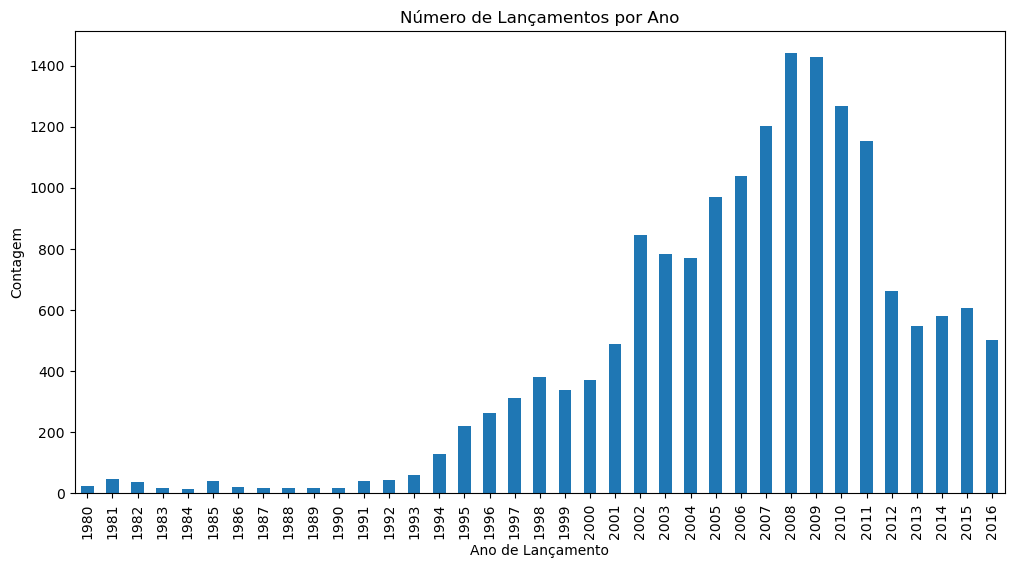

In [18]:
# Gráfico para facilitar a visualização dos dados
df['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6));

plt.title('Número de Lançamentos por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Contagem')
plt.show()

Obs: Sim, existe uma variação de lançamentos muito grande de ano para ano.

In [19]:
# Veja como as vendas variaram de plataforma para plataforma.
# Verificando as vendas totais de cada plataforma
tot_sales_for_platform = df.groupby('platform')['total_sales', ].sum().reset_index()
tot_sales_for_platform = tot_sales_for_platform.sort_values(by='total_sales', ascending=False)
tot_sales_for_platform

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


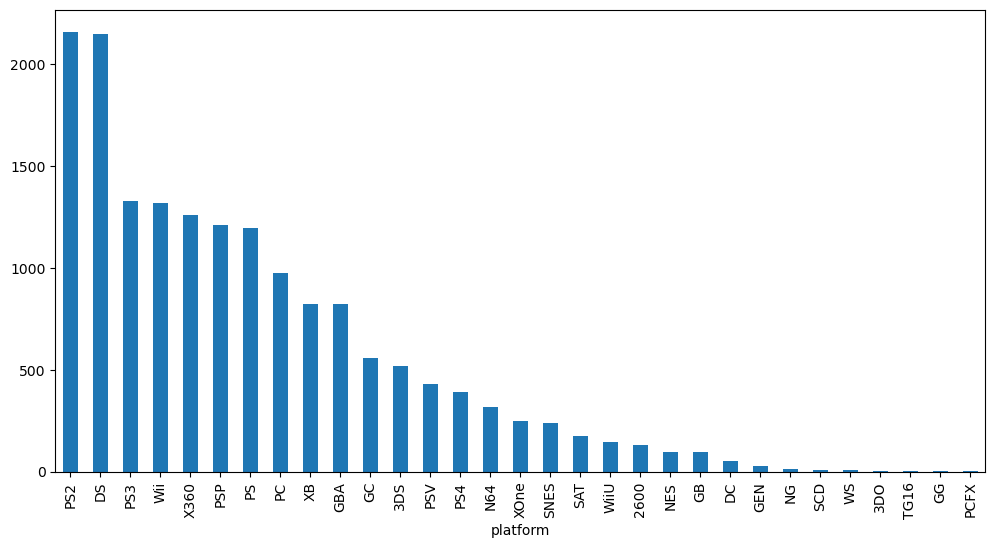

In [20]:
# Criando gráfico para facilitar a visualização dos dados
df['platform'].value_counts().plot(kind='bar', figsize=(12, 6));

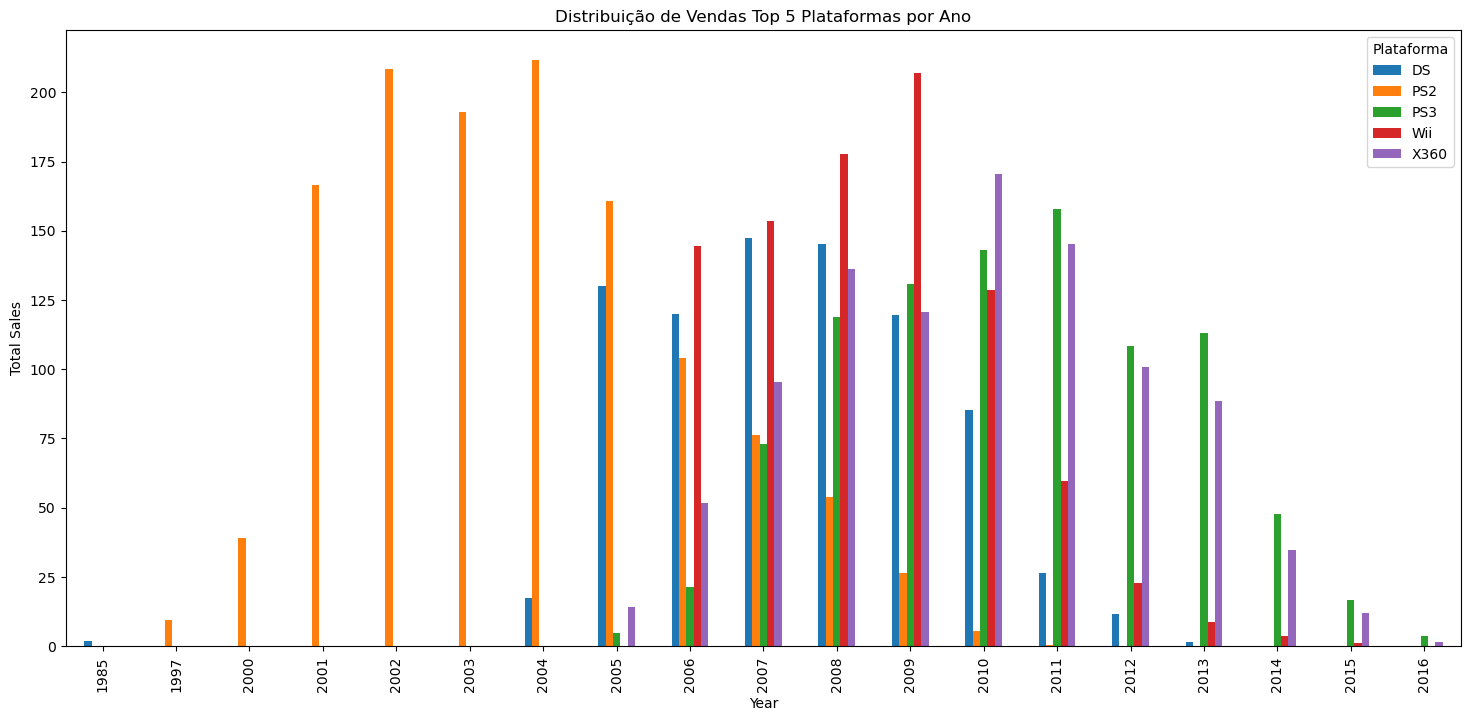

In [21]:
# Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano
# Selecionando as 5 plataformas com maior número de vendas e fazendo um gráfico que mostra a distribuição dos dados com base no ano.

top_5_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS'] # selecionando as plataformas
df_filtrado = df[df['platform'].isin(top_5_platform)] # riando o df com as plaformas de meu interesse


df_filtrado.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='bar',figsize=(18, 8))
plt.title('Distribuição de Vendas Top 5 Plataformas por Ano')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Plataforma', loc='upper right')
plt.show()


### Encontre as plataformas que costumavam ser populares, mas agora não têm vendas.

Obs: Observando o gráfico acima podemos ver claramente que:


- O PS2 teve sua popularidade entre os anos 2000 - 2010

- O DS teve sua popularidade entre os anos 2004 - 2013

- O PS3 teve sua popularidade entre os anos 2006 - 2016

- O Wii teve sua popularidade entre os anos 2006 - 2014

- O X360 teve sua popularidade entre os anos 2006 - 2016

Obs: Tendo em vista as plataformas e os anos de seus auges podemos concluir que o PS2, DS e o Wii eram populares mas agora estão fora da vista dos jogadores.

### Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

Obs: Com base nos nossos dados podemos observar que as plataformas antigas levam em média 8 anos para desaparecem e as novas levam em média 7 anos e meio.

In [22]:
df_aux = df.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index().sort_values(by='min')
df_aux['tempo_de_vida'] = df_aux['max'] - df_aux['min']
df_aux['plataforma_nova'] = df_aux['min'].apply(lambda x: 1 if x >= 2000 else 0)
df_aux.groupby(['plataforma_nova'])['tempo_de_vida'].median()

plataforma_nova
0    8.0
1    7.5
Name: tempo_de_vida, dtype: float64

In [23]:
df_aux

,platform,min,max,tempo_de_vida,plataforma_nova
0,2600,1980,1994,14,0
11,NES,1983,1994,11,0
4,DS,1985,2013,28,0
13,PC,1985,2016,31,0
5,GB,1988,2001,13,0
23,SNES,1990,1999,9,0
8,GEN,1990,1994,4,0
9,GG,1992,1992,0,0
22,SCD,1993,1994,1,0
12,NG,1993,1996,3,0


### Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores. Os dados te deveriam permitir construir um modelo para 2017.
### Trabalhar apenas com os dados que você decidiu que são relevantes. Desconsidere os dados de anos anteriores.

Obs: Com base na analise feita anteriormente, eu decidi selecionar os dados apartir do ano de 2000 considerando as plataformas mais recentes para fazer um modelo para os próximos anos

### Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.

In [24]:
# Plataformas que estão liderando em vendas
platform_leader = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_leader

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [25]:
# Identificando as top nº plataformas lucrativas
top_n_platform = platform_leader.head(10).index.tolist()
top_n_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

In [26]:
# Filtrando o DataFrame para incluir apenas as top plataformas
df_top_n = df[df['platform'].isin(top_n_platform)]
df_top_n = df_top_n.sort_values(by='total_sales', ascending=False)
df_top_n

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,8.500000,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,6.600000,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,68.967679,7.125046,E,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.967679,7.125046,M,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,68.967679,7.125046,T,0.01
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,68.967679,7.125046,M,0.00


14678 rows × 12 columns x 16713 rows × 12 columns

In [27]:
# Plataformas que estão crescendo
platform_growing = df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
platform_growing

platform
GB      2.606735
NES     2.561735
GEN     1.050000
SNES    0.836987
PS4     0.801378
X360    0.769746
2600    0.729173
PS3     0.705973
Wii     0.687508
N64     0.685517
XOne    0.645020
PS      0.610576
PS2     0.581106
WiiU    0.559116
3DS     0.498077
GBA     0.386679
DS      0.374765
GC      0.357788
XB      0.312791
SCD     0.310000
DC      0.306731
PC      0.266448
PSP     0.243218
WS      0.236667
SAT     0.194162
PSV     0.125744
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: total_sales, dtype: float64

### Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

Obs: A diferença de vendas são sim significativas já que tem plataformas com um bom número de vendas e outras que tem seus valores de vendas bem baixos se comparado com outras plataformas

Plataformas como PS4, X360 e WiiU têm médias de vendas relativamente boas, enquanto outras, como 3DO e GG, têm médias muito baixas.

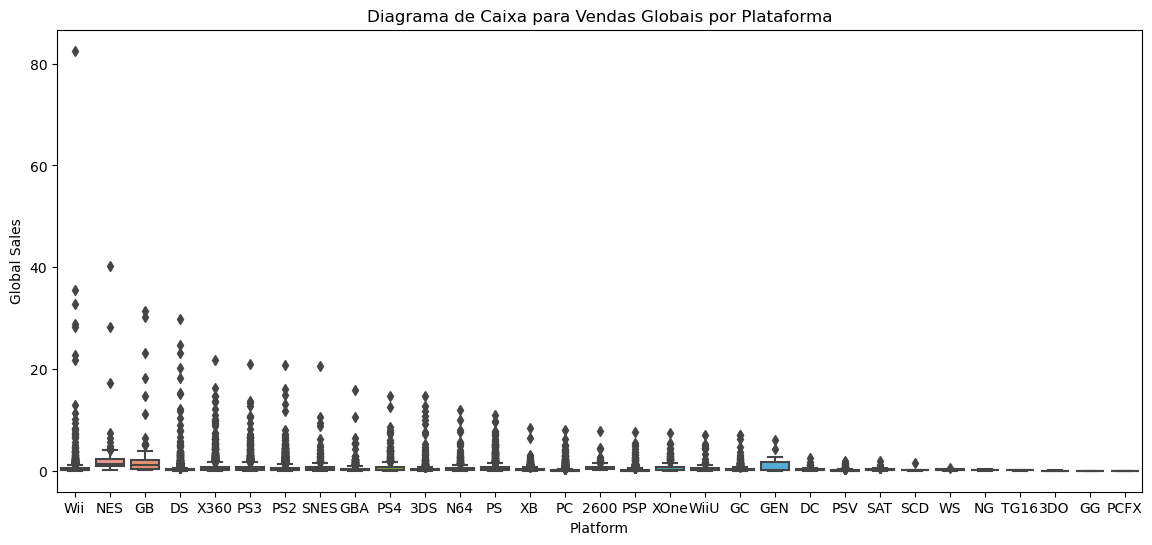

In [28]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='platform', y='total_sales', data=df)
plt.title('Diagrama de Caixa para Vendas Globais por Plataforma')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()

In [29]:
# Realizando uma análise descritiva
analise_descritiva = df.groupby('platform')['total_sales'].describe()
analise_descritiva

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,133.0,0.729173,0.917799,0.07,0.3000,0.460,0.7800,7.81
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3DS,520.0,0.498077,1.430876,0.01,0.0500,0.120,0.3300,14.60
DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
DS,2151.0,0.374765,1.426451,0.01,0.0500,0.110,0.2700,29.80
GB,98.0,2.606735,5.365478,0.06,0.3025,1.165,2.1650,31.38
GBA,822.0,0.386679,0.896897,0.01,0.0525,0.160,0.3900,15.84
GC,556.0,0.357788,0.686346,0.01,0.0600,0.150,0.3525,7.06
GEN,27.0,1.050000,1.490041,0.03,0.0700,0.150,1.7050,6.02


In [30]:
df_ps4 = df[df['platform'].str.contains('PS4')]

### Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.


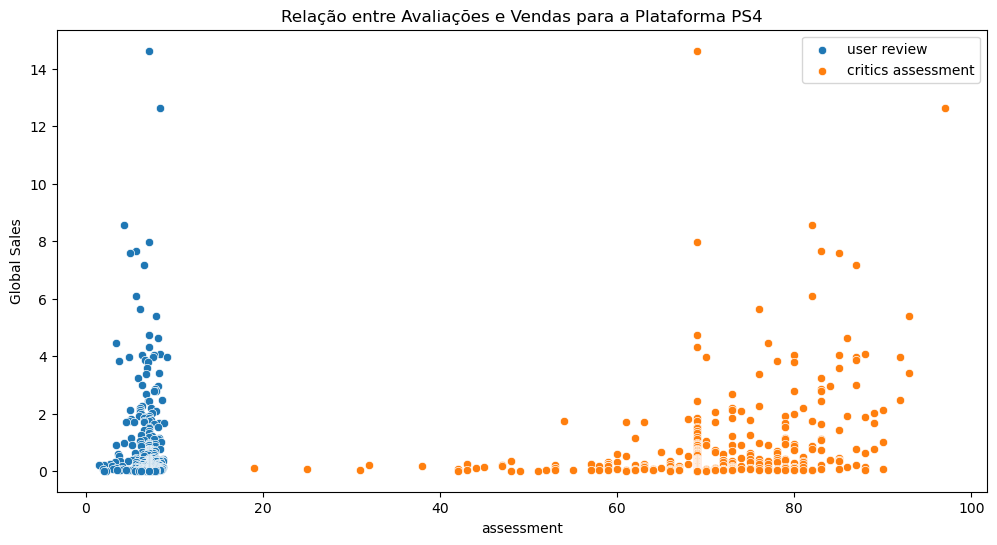

Correlação entre Avaliação de Usuários e Vendas: -0.05
Correlação entre Avaliação de Críticos e Vendas: 0.35


In [31]:
# Criar um gráfico de dispersão
plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='total_sales', data=df_ps4, label='user review')
sns.scatterplot(x='critic_score', y='total_sales', data=df_ps4, label='critics assessment')
plt.title('Relação entre Avaliações e Vendas para a Plataforma PS4')
plt.xlabel('assessment')
plt.ylabel('Global Sales')
plt.legend()
plt.show()

# Calcular a correlação entre avaliações de usuários, críticos e vendas
correlacao_user_sales = df_ps4['user_score'].corr(df_ps4['total_sales'])
correlacao_critic_sales = df_ps4['critic_score'].corr(df_ps4['total_sales'])

print(f"Correlação entre Avaliação de Usuários e Vendas: {correlacao_user_sales:.2f}")
print(f"Correlação entre Avaliação de Críticos e Vendas: {correlacao_critic_sales:.2f}")

Obs: A relação entre as avaliações dos críticos e as vendas de jogos é mais notável do que a relação entre as avaliações dos usuários e as vendas. Isso significa que, para essa plataforma PS4, o que os críticos dizem sobre um jogo pode ter um impacto um pouco maior nas vendas do que as opiniões dos próprios jogadores.

Dica: Podemos ter uma compreensão mais abrangente dos fatores que influenciam as vendas fazendo aglumas analises adicionais como testes de hipóteses.


### Tendo suas conclusões em mente, compare as vendas dos mesmos jogos em outras plataformas.

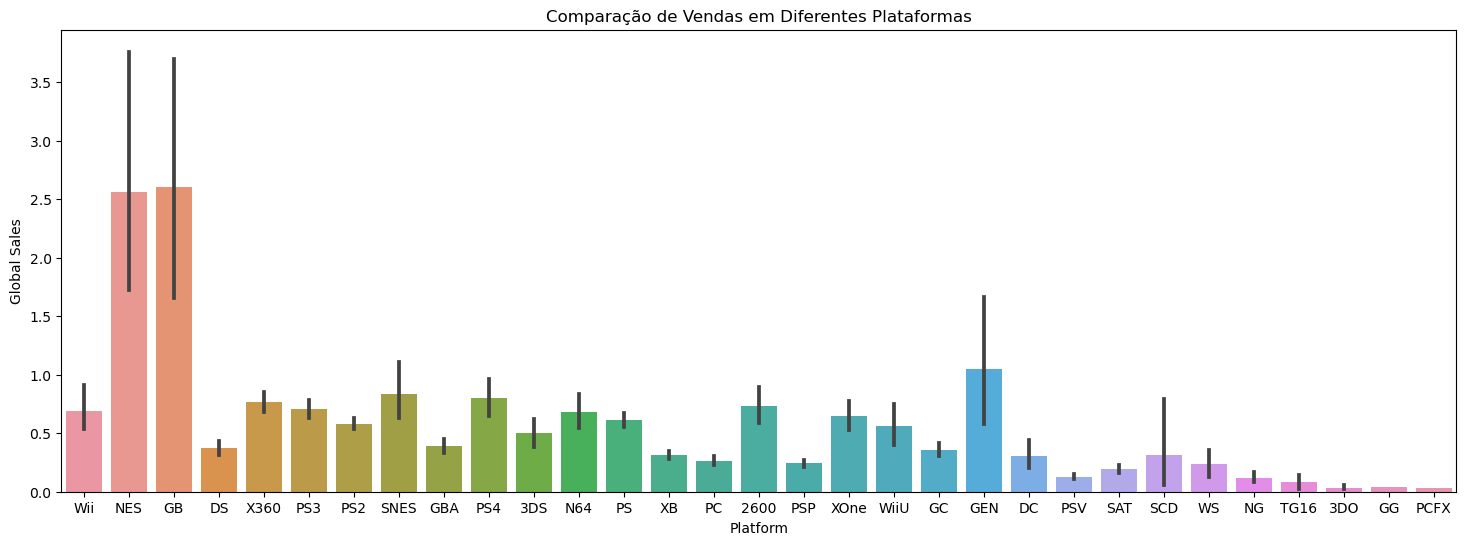


Média de Vendas por Plataforma:
platform
2600    0.729173
3DO     0.033333
3DS     0.498077
DC      0.306731
DS      0.374765
GB      2.606735
GBA     0.386679
GC      0.357788
GEN     1.050000
GG      0.040000
N64     0.685517
NES     2.561735
NG      0.120000
PC      0.266448
PCFX    0.030000
PS      0.610576
PS2     0.581106
PS3     0.705973
PS4     0.801378
PSP     0.243218
PSV     0.125744
SAT     0.194162
SCD     0.310000
SNES    0.836987
TG16    0.080000
WS      0.236667
Wii     0.687508
WiiU    0.559116
X360    0.769746
XB      0.312791
XOne    0.645020
Name: total_sales, dtype: float64

Total de Vendas por Plataforma:
platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       28.35
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD

In [32]:
# Criando um gráfico de barras para comparar as vendas em diferentes plataformas
plt.figure(figsize=(18, 6))
sns.barplot(x='platform', y='total_sales', data=df)
plt.title('Comparação de Vendas em Diferentes Plataformas')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()

# Calculando métricas de resumo
media_vendas_por_plataforma = df.groupby('platform')['total_sales'].mean()
total_vendas_por_plataforma = df.groupby('platform')['total_sales'].sum()

print("\nMédia de Vendas por Plataforma:")
print(media_vendas_por_plataforma)

print("\nTotal de Vendas por Plataforma:")
print(total_vendas_por_plataforma)

### Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

Obs: Com base nos gráficos abaixo podemos dizer que jogos do gênero "ACTION" e "ROLE-PLAYING" são mais lucrativos se comparados com jogos do gênero "PUZZLE" e "STRATEGY", não posso generalizar pois as vendas para cada gênero de jogo varia de região para região.

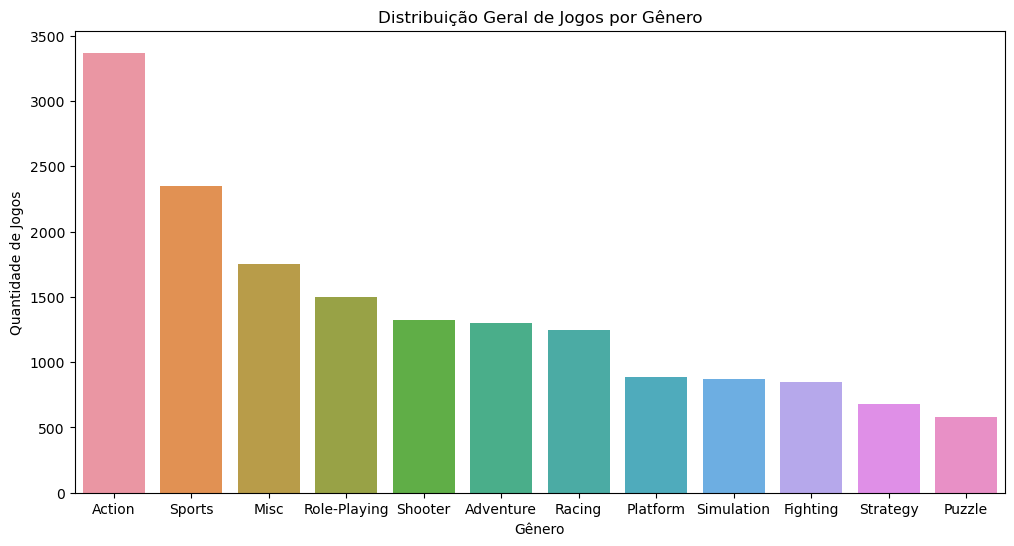

In [33]:
# Criando um gráfico de barras para a distribuição de jogos por gênero
plt.figure(figsize=(12, 6))
sns.countplot(x='genre', data=df, order=df['genre'].value_counts().index)
plt.title('Distribuição Geral de Jogos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Jogos')
plt.show()

C:\Users\B450M\AppData\Local\Temp\ipykernel_13440\430289088.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genre', y='total_sales', data=df, ci=None)


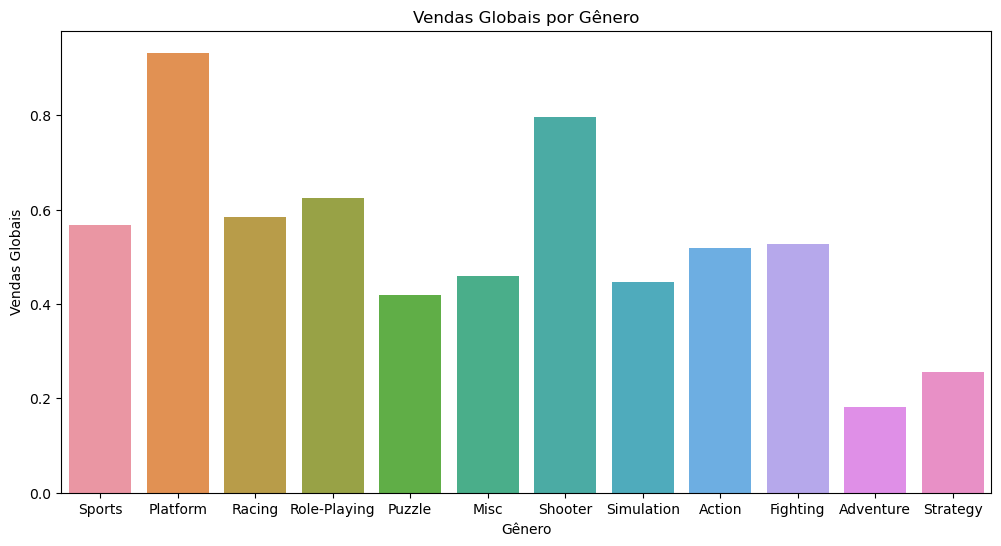

In [34]:
# Criar um gráfico de barras para as vendas globais por gênero
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='total_sales', data=df, ci=None)
plt.title('Vendas Globais por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas Globais')
plt.show()

# Criando um perfil para cada região

### Para cada região (AN, UE, JP), determine:

### As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.

In [35]:
# NA
top_platforms_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).index
top_platforms_na

Index(['X360', 'PS2', 'Wii', 'PS3', 'DS'], dtype='object', name='platform')

C:\Users\B450M\AppData\Local\Temp\ipykernel_13440\2104100316.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='platform', y='na_sales', data=df, order=top_platforms_na, ci=None)


Text(0, 0.5, 'Vendas Globais')

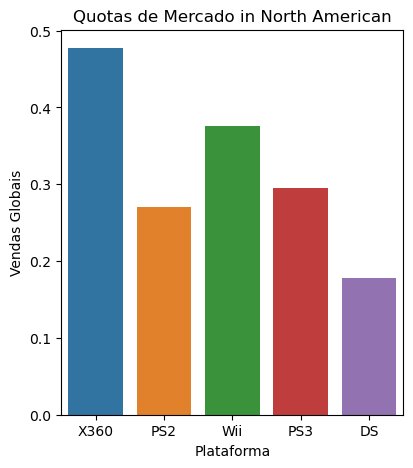

In [36]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x='platform', y='na_sales', data=df, order=top_platforms_na, ci=None)
plt.title('Quotas de Mercado in North American')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais')

In [37]:
# UE
top_platforms_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).index
top_platforms_eu

Index(['PS2', 'PS3', 'X360', 'Wii', 'PS'], dtype='object', name='platform')

C:\Users\B450M\AppData\Local\Temp\ipykernel_13440\1448626406.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='platform', y='eu_sales', data=df, order=top_platforms_eu, ci=None)


Text(0, 0.5, 'Vendas Globais')

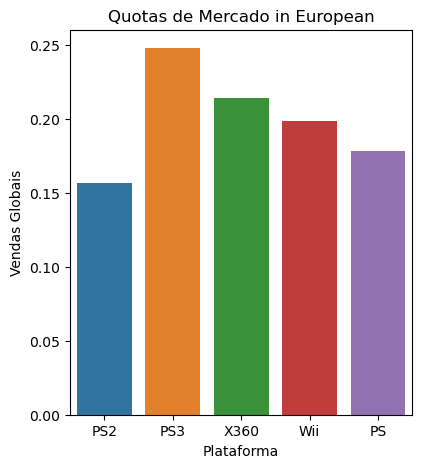

In [38]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
sns.barplot(x='platform', y='eu_sales', data=df, order=top_platforms_eu, ci=None)
plt.title('Quotas de Mercado in European')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais')

In [39]:
# JP
top_platforms_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).index
top_platforms_jp

Index(['DS', 'PS', 'PS2', 'SNES', '3DS'], dtype='object', name='platform')

C:\Users\B450M\AppData\Local\Temp\ipykernel_13440\2711037034.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='platform', y='jp_sales', data=df, order=top_platforms_jp, ci=None)


Text(0, 0.5, 'Vendas Globais')

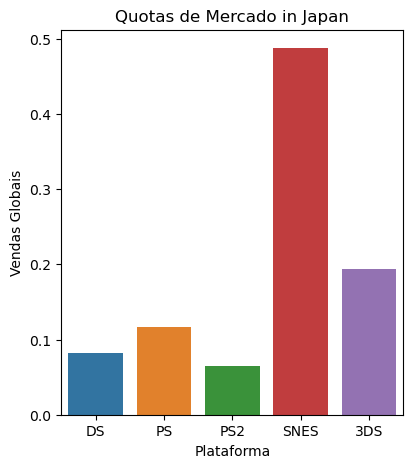

In [40]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
sns.barplot(x='platform', y='jp_sales', data=df, order=top_platforms_jp, ci=None)
plt.title('Quotas de Mercado in Japan')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais')

# Os cinco principais gêneros. Explique a diferença.

Obs: Observando os gráficos abaixo podemos observar que os gêneros sports,misc e action estão dominantes nas 3 regiões ja platform e shooter apenas em 2/3 regiões e racing role-playing aparecem predominantes em apenas 1/3 regiões.

C:\Users\B450M\AppData\Local\Temp\ipykernel_13440\3970616980.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genre', y='na_sales', data=df_top_genres_na, ci=None)


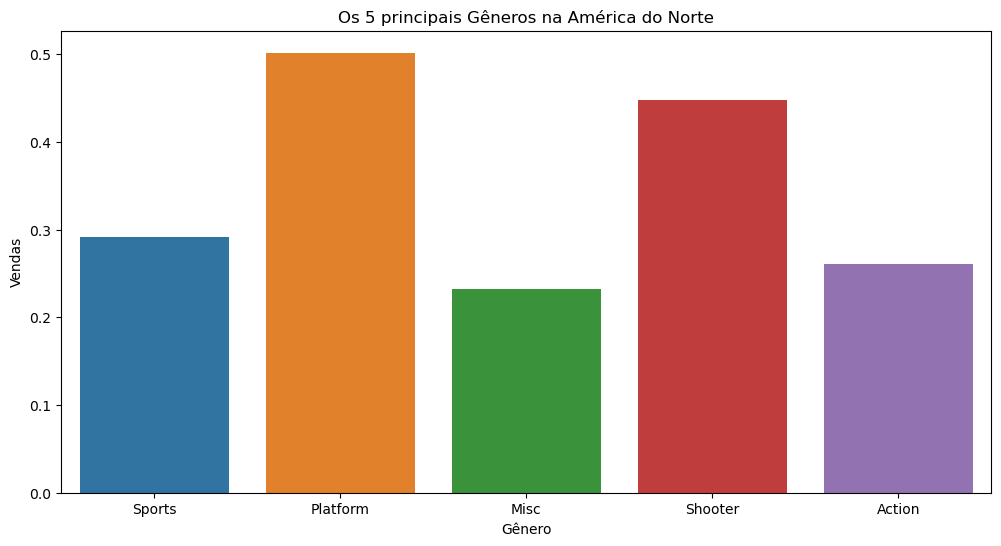

In [41]:
# 5 principais gêneros no NA
top_genres_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).index
df_top_genres_na = df[df['genre'].isin(top_genres_na)]
plt.figure(figsize=(12, 6))

# Criaando um gráfico de barras para os 5 principais gêneros da região NA
sns.barplot(x='genre', y='na_sales', data=df_top_genres_na, ci=None)
plt.title('Os 5 principais Gêneros na América do Norte')
plt.xlabel('Gênero')
plt.ylabel('Vendas')
plt.show()

C:\Users\B450M\AppData\Local\Temp\ipykernel_13440\3637569531.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genre', y='eu_sales', data=df_top_genres_eu, ci=None)


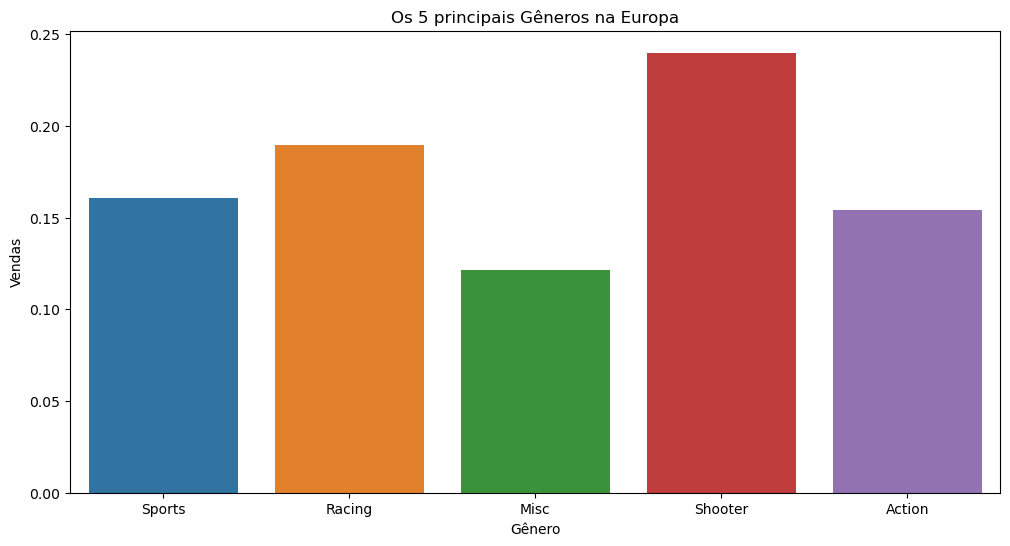

In [42]:
# 5 principais gêneros no EU
top_genres_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).index
df_top_genres_eu = df[df['genre'].isin(top_genres_eu)]

# Criaando um gráfico de barras para os 5 principais gêneros da região EU
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='eu_sales', data=df_top_genres_eu, ci=None)
plt.title('Os 5 principais Gêneros na Europa')
plt.xlabel('Gênero')
plt.ylabel('Vendas')
plt.show()

C:\Users\B450M\AppData\Local\Temp\ipykernel_13440\1159500843.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genre', y='jp_sales', data=df_top_genres_jp, ci=None)


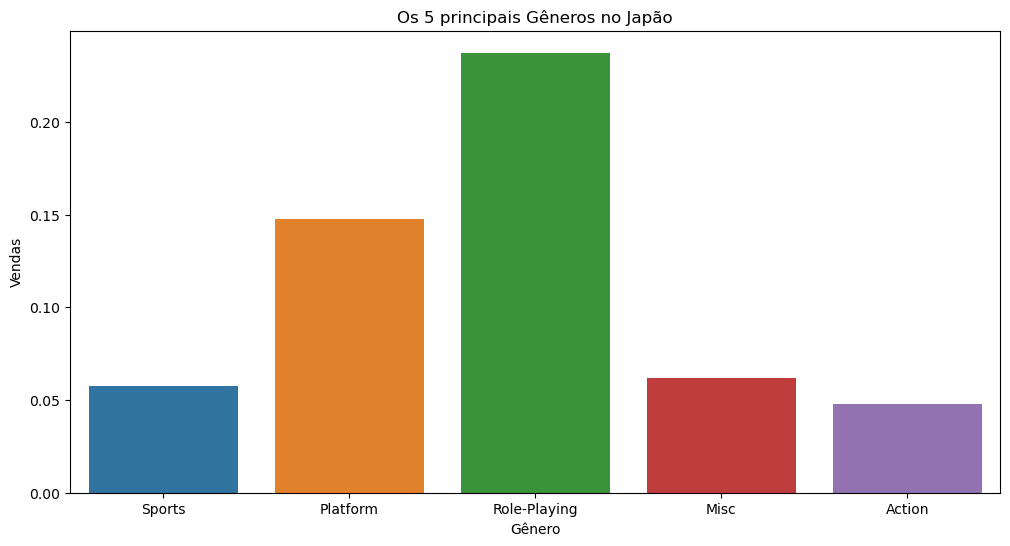

In [43]:
# 5 principais gêneros no JP
top_genres_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).index
df_top_genres_jp = df[df['genre'].isin(top_genres_jp)]

# Criaando um gráfico de barras para os 5 principais gêneros da região JP
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='jp_sales', data=df_top_genres_jp, ci=None)
plt.title('Os 5 principais Gêneros no Japão')
plt.xlabel('Gênero')
plt.ylabel('Vendas')
plt.show()

# As classificações do ESRB afetam as vendas em regiões individuais?

Obs: Observando os gráficos sobre as vendas por classificação de faixa etária podemos observar que as vendas são maiores para os publicos K-A(Kids to Adults) e AO(adults only) na América do Norte, já na Europa temos AO(adults only) liderando as vendas e logo após temos E(everyone) e T(teens), no Japão as vendas crescem mais para o publico K-A(Kids to Adults) e M(mature).

C:\Users\B450M\AppData\Local\Temp\ipykernel_13440\3376070365.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='rating', y='na_sales', data=df, ci=None)


Text(0, 0.5, 'Vendas')

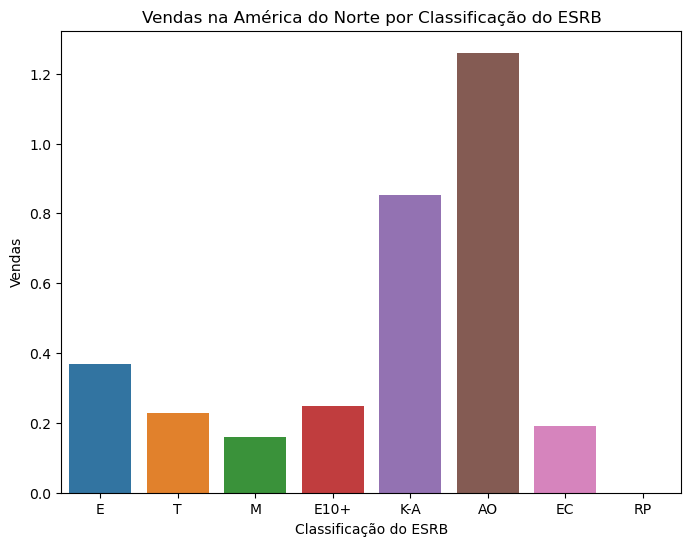

In [44]:
# América do Norte
plt.figure(figsize=(8, 6))
sns.barplot(x='rating', y='na_sales', data=df, ci=None)
plt.title('Vendas na América do Norte por Classificação do ESRB')
plt.xlabel('Classificação do ESRB')
plt.ylabel('Vendas')

C:\Users\B450M\AppData\Local\Temp\ipykernel_13440\1741749873.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='rating', y='eu_sales', data=df, ci=None)


Text(0, 0.5, 'Vendas')

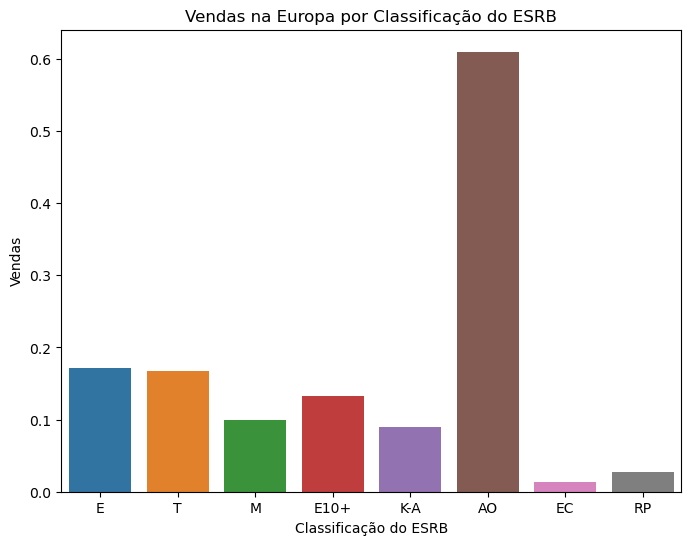

In [45]:
# Europa
plt.figure(figsize=(8, 6))
sns.barplot(x='rating', y='eu_sales', data=df, ci=None)
plt.title('Vendas na Europa por Classificação do ESRB')
plt.xlabel('Classificação do ESRB')
plt.ylabel('Vendas')

C:\Users\B450M\AppData\Local\Temp\ipykernel_13440\3963318402.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='rating', y='jp_sales', data=df, ci=None)


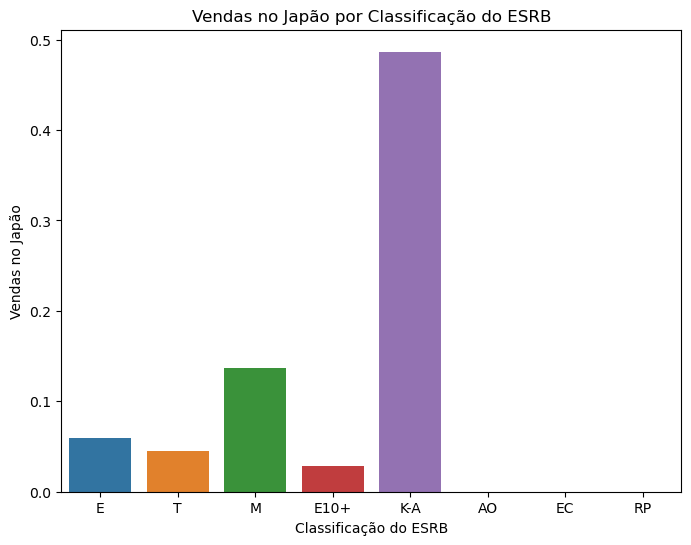

In [46]:
# Japão
plt.figure(figsize=(8, 6))
sns.barplot(x='rating', y='jp_sales', data=df, ci=None)
plt.title('Vendas no Japão por Classificação do ESRB')
plt.xlabel('Classificação do ESRB')
plt.ylabel('Vendas no Japão')
plt.show()

# Teste de hipóteses

Testando as seguintes hipóteses

- — As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

Obs: Rejeitamos a hipótese nula, então podemos afirmar com confiança que as vendas totais das duas plataformas são diferentes. As vendas entre as plataformas Xbox e PC tem uma diferença significativa.

- — As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

Obs: Não rejeitamos a hipótese nula, o que significa que não há evidências suficientes para concluir que as classificações médias são diferentes.

Defina o valor do limiar alfa você mesmo.

Obs: Valor limiar do alfa em 0.05

Explique:
- — Como você formula as hipóteses alternativas e nulas.

Obs: Eu faço meus testes de hipóteses com um valor de alfa de 0.05, e então tiro as minhas conclusões como no teste de hipótese acima ambos dados comparados obtivemos dados em que não poderiamos rejeitar a hipótese nula então conclui que: não podemos afirmar com confiança que há uma diferença estatisticamente significativa entre plataformas e generos comparados mas isso não significa que não existe uma diferença real entre as plataformas e generos comparados.

- — Quais critérios você usou para testar as hipóteses, e por quê

Obs: Utilizei Um valor de alfa de 0.05 significa que há uma probabilidade de 5% de cometer um erro, é um valor alpha padrão na prática de estatistica e também por estar mais acostumado a utilizar o valor alpha em 0.05 me gera mais confiança em meus resultados.

In [47]:
# As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

xbox_sales = df.loc[df['platform'] == 'XOne', 'total_sales'].tolist()
pc_sales = df.loc[df['platform'] == 'PC', 'total_sales'].tolist()

In [48]:
# nível crítico de significância estatística
alpha = 0.05
# se o valor-p for menor que alfa, rejeitamos a hipótese nula

results = st.ttest_ind(xbox_sales, pc_sales, equal_var=False)

print('Valor-p:', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

Valor-p: 1.0196533966248761e-07
Rejeitamos a hipótese nula


Obs: Rejeitamos a hipótese nula, então podemos afirmar com confiança que as vendas totais das duas plataformas são diferentes. As vendas entre as plataformas Xbox e PC tem uma diferença significativa.

In [49]:
# As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

action_ratings = df.loc[df['genre'] == 'Action', 'user_score'].tolist()
sports_ratings = df.loc[df['genre'] == 'Sports', 'user_score'].tolist()

In [50]:
# nível crítico de significância estatística
alpha = 0.05
# se o valor-p for menor que alfa, rejeitamos a hipótese nula

results = st.ttest_ind(action_ratings, sports_ratings, equal_var=False)

print('Valor-p:', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

Valor-p: 0.1878227241619563
Não podemos rejeitar a hipótese nula


Obs: Não rejeitamos a hipótese nula, o que significa que não há evidências suficientes para concluir que as classificações médias são diferentes.

### Como você formula as hipóteses alternativas e nulas

Obs: Eu faço meus testes de hipóteses com um valor de alfa de 0.05, e então tiro as minhas conclusões como no teste de hipótese acima ambos dados comparados obtivemos dados em que não poderiamos rejeitar a hipótese nula então conclui que: não podemos afirmar com confiança que há uma diferença estatisticamente significativa entre plataformas e generos comparados mas isso não significa que não existe uma diferença real entre as plataformas e generos comparados.

#  Quais critérios você usou para testar as hipóteses, e por quê

Obs: Utilizei Um valor de alfa de 0.05 significa que há uma probabilidade de 5% de cometer um erro, é um valor alpha padrão na prática de estatistica e também  por estar mais acostumado a utilizar o valor alpha em 0.05 me gera mais confiança em meus resultados.

# Conclusão

Após seguir todos os padrões estabelecidos para um analista de dados, tirei minhas conclusões e pude observar que as plataformas xbox, ps2, ps3 e wii se destacaram no aspecto de vendas globais se comparado com as demais plataformas, em relação ao gênero dos jogos eu pude concluir que os gêneros sports,misc e action estavam dominantes nas vendas das regiões North American, Europe e Japan em relação com os outros gêneros de jogos. As vendas são maiores para os publicos K-A(Kids to Adults) e AO(adults only) na América do Norte, já na Europa temos AO(adults only) liderando as vendas e logo após temos E(everyone) e T(teens), no Japão as vendas crescem mais para o publico K-A(Kids to Adults) e M(mature).